# Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [5]:
df=pd.read_csv(r'C:\Users\Nancy Meshram\Downloads\final.csv')

In [6]:
df.head()

,Unnamed: 0,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,neg,neu,pos,compound
0,0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,0.292,0.708,0.000,-0.5106
1,1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,0.000,0.633,0.367,0.8268
2,2,Do some research before spouting nonsense,0.90,50420,0,False,1008,0.351,0.649,0.000,-0.4019
3,3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,0.000,1.000,0.000,0.0000
4,4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157,0.319,0.681,0.000,-0.7269


# Removing the Unnamed column

In [7]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Title,Upvote_ratio,Score,Gilded,Over_18,Number_of_Comments,neg,neu,pos,compound
0,House impeaches Trump for second time over Cap...,0.72,39464,2,False,8801,0.292,0.708,0.000,-0.5106
1,I'm a 16 yr old blacksmith and I forged this w...,0.90,29423,0,False,443,0.000,0.633,0.367,0.8268
2,Do some research before spouting nonsense,0.90,50420,0,False,1008,0.351,0.649,0.000,-0.4019
3,Moving boxes arrive at the White House,0.81,149858,6,False,4392,0.000,1.000,0.000,0.0000
4,“No One Took Us Seriously”: Black Cops Warned ...,0.98,7768,0,False,157,0.319,0.681,0.000,-0.7269


In [8]:
df.shape

(7471, 10)

In [9]:
df.describe()

,Upvote_ratio,Score,Gilded,Number_of_Comments,neg,neu,pos,compound
count,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000
mean,0.970517,3960.950609,0.054477,100.394191,0.072083,0.809740,0.118174,0.061779
std,0.032544,10657.376656,0.382486,452.414870,0.158596,0.238514,0.201699,0.352541
min,0.630000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.970900
25%,0.960000,283.000000,0.000000,10.000000,0.000000,0.649500,0.000000,0.000000
50%,0.980000,796.000000,0.000000,26.000000,0.000000,1.000000,0.000000,0.000000
75%,0.990000,2703.500000,0.000000,73.000000,0.000000,1.000000,0.198000,0.296000
max,1.000000,169633.000000,17.000000,24155.000000,1.000000,1.000000,1.000000,0.973500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               7471 non-null   object 
 1   Upvote_ratio        7471 non-null   float64
 2   Score               7471 non-null   int64  
 3   Gilded              7471 non-null   int64  
 4   Over_18             7471 non-null   bool   
 5   Number_of_Comments  7471 non-null   int64  
 6   neg                 7471 non-null   float64
 7   neu                 7471 non-null   float64
 8   pos                 7471 non-null   float64
 9   compound            7471 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 532.7+ KB


In [11]:
df.nunique()

Title                 7188
Upvote_ratio            33
Score                 3577
Gilded                   9
Over_18                  2
Number_of_Comments     618
neg                    510
neu                    671
pos                    583
compound               796
dtype: int64

# Changing the boolean column into the integer column

In [12]:
df['Over_18'] = df['Over_18']*1
df['Over_18'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Over_18, dtype: int32

# Plotting a scatter plot for all the variables

<Figure size 800x640 with 0 Axes>

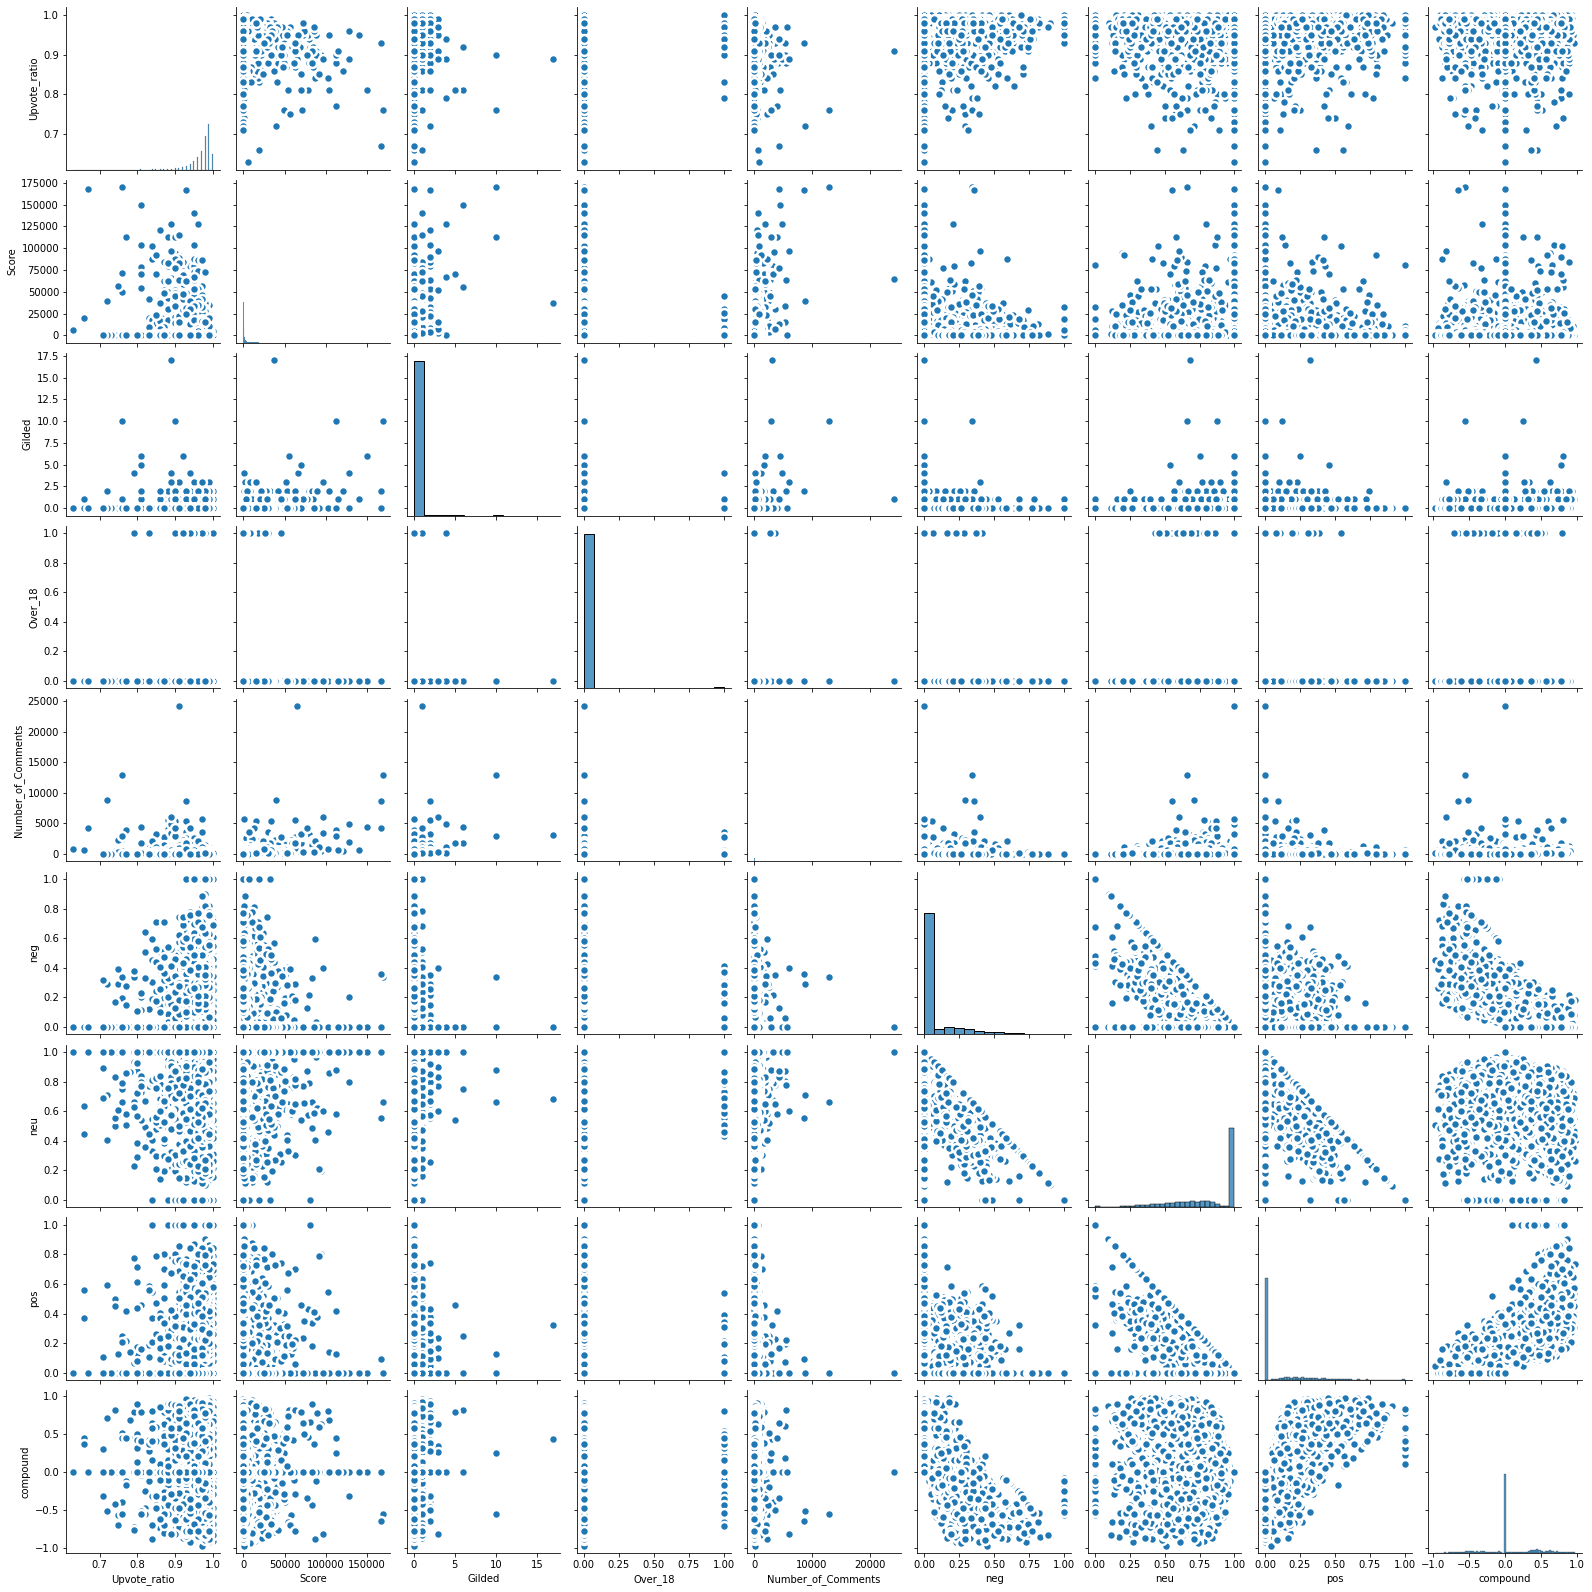

In [13]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

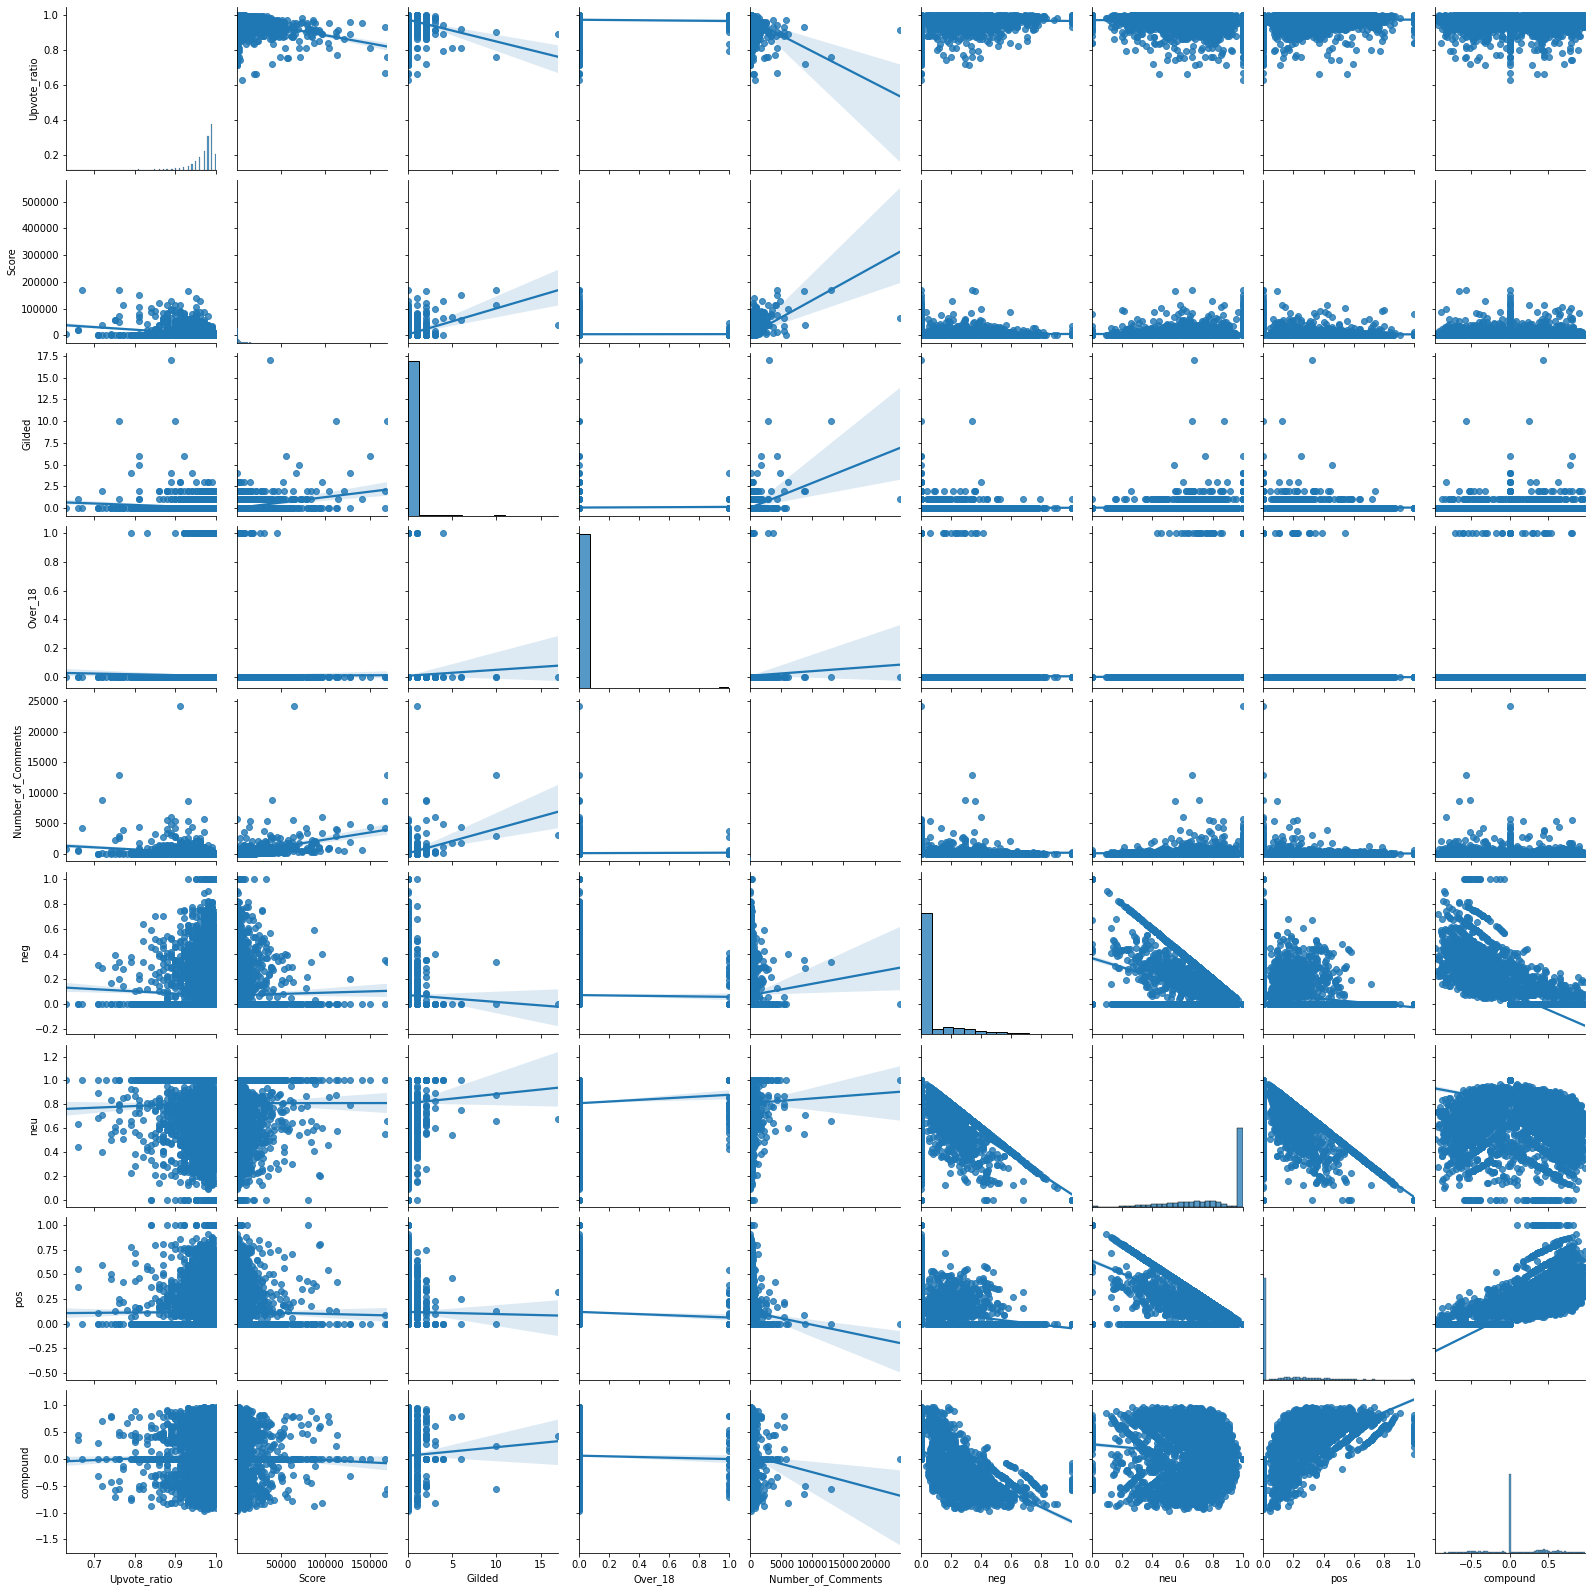

In [14]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg")
plt.show()

# Plotting the density distribution

<AxesSubplot:xlabel='Number_of_Comments', ylabel='Density'>

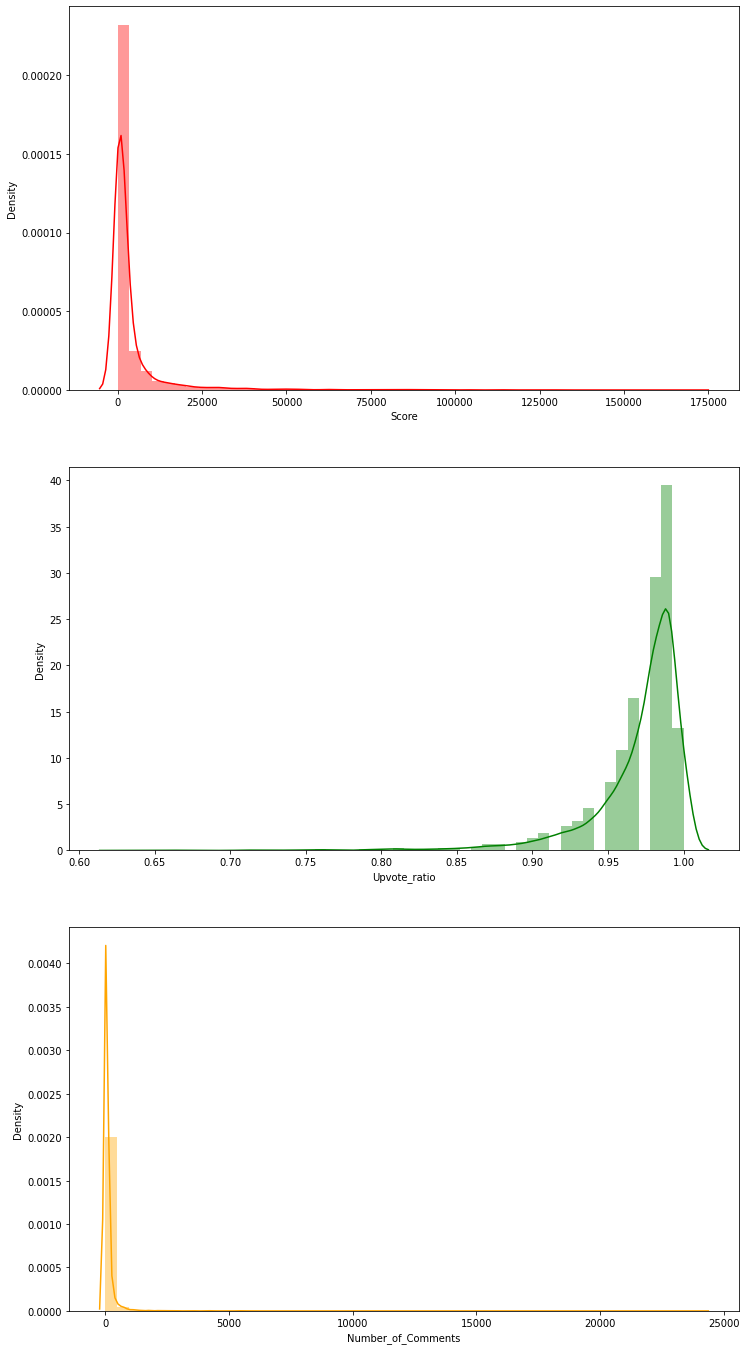

In [15]:
f, ax = plt.subplots(3, figsize=(12,24))
sns.distplot(df.Score,color='red',ax=ax[0])
sns.distplot(df.Upvote_ratio,color='green',ax=ax[1])
sns.distplot(df.Number_of_Comments,color='orange',ax=ax[2])

# Plotting the correlation graph

<AxesSubplot:>

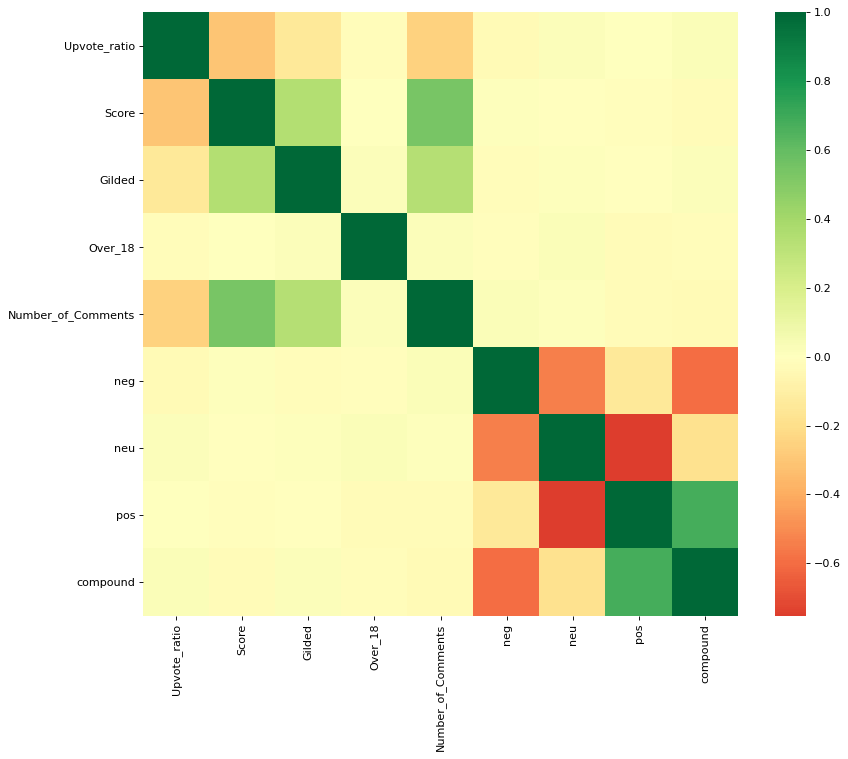

In [16]:
plt.figure(figsize=(12,10),dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=False)

In [17]:
X=df[['Title','Upvote_ratio','Gilded','Over_18','Number_of_Comments','neg','neu','pos','compound']].copy()
y=df.Score.values

# Splitting the dataset into train dataset and test dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Using the columntransformer to transform the categorical column

In [19]:
preprocess = ColumnTransformer(
    [('Title_tfidf', TfidfVectorizer(max_features = None,stop_words = 'english', ngram_range=(1,3)), 'Title')],
     remainder='passthrough')

In [20]:
preprocess.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Title_tfidf',
                                 TfidfVectorizer(ngram_range=(1, 3),
                                                 stop_words='english'),
                                 'Title')])

In [21]:
preprocess.transform(X_train)

<5976x49330 sparse matrix of type '<class 'numpy.float64'>'
	with 93358 stored elements in Compressed Sparse Row format>

In [22]:
preprocess.transform(X_test)

<1495x49330 sparse matrix of type '<class 'numpy.float64'>'
	with 12706 stored elements in Compressed Sparse Row format>

# KNeighbors Model

In [35]:
from sklearn.neighbors import KNeighborsRegressor
model = make_pipeline(
    preprocess,
   KNeighborsRegressor(n_neighbors=40,metric='minkowski',n_jobs=1,leaf_size=10))
    
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
print('Test R_2: %.4f' % test_r2)

Train RMSE: 7548.3074
Test RMSE: 6960.7180
Test R_2: 0.5625


# RandomForest Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
model = make_pipeline(
    preprocess,
   RandomForestRegressor(n_jobs=-1, n_estimators=50, min_samples_leaf=20, random_state = 0))
    
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
print('Test R_2: %.4f' % test_r2)

Train RMSE: 6910.0578
Test RMSE: 6555.7066
Test R_2: 0.6120


# DecisionTree Model

In [72]:
from sklearn.tree import DecisionTreeRegressor
model = make_pipeline(
    preprocess,
   DecisionTreeRegressor(min_samples_leaf=30,criterion='mse',min_samples_split=40,random_state = 0))
    
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
print('Test R_2: %.4f' % test_r2)

Train RMSE: 7137.0752
Test RMSE: 6789.5202
Test R_2: 0.5838


# SupportVectorRegressor Model

In [76]:
from sklearn.svm import SVR
model = make_pipeline(
    preprocess,
   SVR(kernel='linear'))
    
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
print('Test R_2: %.4f' % test_r2)

Train RMSE: 10742.1098
Test RMSE: 7292.4505
Test R_2: 0.5198
